# Fashion Images Classification Model Using CNN

## Introduction and General Information

**Convolutional Neural Networks (CNN)**

* CNN are widely used for image classification. It is a process in which we provide input to the model in the form of images and obtain the image class or the probability that the input image belongs to a particular class. 


* Humans can look at an image and recognize what it is, but it is not same for machines. Each image is a series of pixel values arranged in particular order. We have to represent the image in a manner a machine can understand. This can be achieved using a CNN Model.


* If we have a black and white image, the pixels are arranged in the form of 2D array. Each pixel has a value between 0 - 255. 
    * 0 means completely white
    * 255 means completely black
    * Grayscale exists if the number lies between 0 and 255


* If we have a colored image, then the pixels are arranged in the form of 3D array. This 3D array has blue, green and red layers.
    * Each color has pixel values ranging from 0 - 255
    * We can find the exact color by combining the pixel values of each of the 3 layers.

**Keras and TensorFlow**

* In deep learning or machine learning, we have datasets which are mostly multi-dimensional, where each dimension represents different features of the data.


* Tensor is the way of representing such multi-dimensional data. In this project, we are dealing with fashion object images. There can be many aspects to an image such as shape, edges, boundaries etc. In order to classify these images correctly as different objects, the convolutional network will have to learn to discriminate these features. These features are incorporated by TensorFlow 


* Keras is a high-level library which is built on top of TensorFlow. It provides a scikit-learn type API for building Neural Networks. Hence, it simplifies the process of building neural networks as we don't have to worry about mathematical aspects of TensorFlow algebra.


## Objectives

* Building a convolutional neural networks model using Keras to classify the images of fashion articles into 10 different class items. 


* Evaluating the performance of the model using classification report(Precision, Recall, F1-Score and Accuracy) and Confusion matrix.

## Data Used
(Source: https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion)

We are using Fashion MNIST dataset for the purpose of this project. This dataset consists of images related to fashion articles. There are 60,000 images for training and 10,000 images for testing purpose.
* There are total 784 pixels (28 x 28) in each image.


* Each pixel has an integer value between the range 0 - 255. Higher integer value represents darker pixel and lower integer value represents lighter pixels.


* Each image is associated with one of the 10 classes. These classes are namely:
    * 0 - T_shirt/top
    * 1 - Trouser
    * 2 - Pullover
    * 3 - Dress
    * 4 - Coat
    * 5 - Sandal
    * 6 - Shirt
    * 7 - Sneaker
    * 8 - Bag
    * 9 - Ankle boot

## Approach and Methodology

* Loading the fashion MNIST dataset and converting the train/test data into pandas dataframe. These dataframes will have class label as the first column followed by 784 columns for pixel values.


* Converting these dataframes into numpy array as it is the acceptable form of input for TensorFlow and Keras.


* Pre-processing train and test numpy arrays in order to make them ready to be fed into the CNN model. 


* Visualizing few of the images from the train dataset to get better insight of the data being used.


* Building and training convolutional neural network model based on the training dataset.


* Evaluating the performance of class predictions using test dataset.

### 1. Importing Libraries

In [2]:
import pathlib
import pandas as pd
import numpy as np
import itertools
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import warnings
warnings.filterwarnings('ignore')

### 2. Loading Fashion MNIST Dataset

In [3]:
BASE_PATH = str(pathlib.Path().absolute())
TRAIN_IMAGE_PATH = BASE_PATH + '/data_files/train-images-idx3-ubyte'
TRAIN_LABEL_PATH = BASE_PATH + '/data_files/train-labels-idx1-ubyte'
TEST_IMAGE_PATH = BASE_PATH + '/data_files/t10k-images-idx3-ubyte'
TEST_LABEL_PATH = BASE_PATH + '/data_files/t10k-labels-idx1-ubyte'

In [4]:
BASE_PATH

'/Users/setugandhi/Studies/Projects/fashion-images-classification'

**Method to convert the MNIST dataset into pandas dataframe**

* The first column in this dataframe will be for class labels ranging from 0 - 10.

* Following 784 columns will be for actual pixel values.

In [4]:
def converting_mnist_dataset_to_dataframe(image_path, label_path):
    # Step 1: Loading mnist dataset
    image_data, label_data = loadlocal_mnist(image_path, label_path)
    # Step 2: Converting mnist images and labels data to pandas dataframe.
    image_df = pd.DataFrame(data=image_data, index=None, columns=None)
    label_df = pd.DataFrame(data=label_data, index=None, columns=['Label'])
    # Step 3: Combining images and labels dataframes
    combined_df = pd.concat([label_df, image_df], axis=1, sort=False)    
    
    return combined_df

In [5]:
train_df = converting_mnist_dataset_to_dataframe(TRAIN_IMAGE_PATH,TRAIN_LABEL_PATH)
test_df = converting_mnist_dataset_to_dataframe(TEST_IMAGE_PATH,TEST_LABEL_PATH)

In [6]:
train_df

,Label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [7]:
test_df

,Label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,164,58,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6,0,0,0,2,0,1,1,0,0,...,71,12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Data pre-processing

#### Converting pandas dataframe to numpy array
We do this for train and test data because numpy array of type float32 is one of the acceptable input to tensorflow and keras.

In [13]:
train_np_array = np.array(train_df, dtype = 'float32')
train_np_array

array([[9., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [3., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
test_np_array = np.array(test_df, dtype = 'float32')
test_np_array

array([[9., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Slicing train numpy array into image and label arrays, namely train_image and train_label.**
* train_image will contain all the pixel values from column 1 to 784.
* train_label will only contain labels from the first column.
* Since pixel values in train_image ranges from 0 to 255, we will normalize the values between 0 and 1.

In [15]:
train_image = train_np_array[:,1:]/255
train_label = train_np_array[:,0]

**Splitting training data into validation data and actual training data.**

We divide training dataset into two portions - actual training dataset and validation dataset. 
* Actual dataset is used to build the model.
* Validation dataset is used to evaluate the performance of the model for each epoch.

In [16]:
train_image, validate_image, train_label, validate_label = train_test_split(train_image,train_label,test_size = 0.2,random_state = 12345)

**Similarly slicing test numpy array into image and label arrays namely test_image and test_label.**

* test_image will contain all the pixel values from column 1 to 784.
* test_label will only contain labels from the first column.
* Since pixel values in test_image ranges from 0 to 255, we will normalize the values between 0 and 1.

In [17]:
test_image = test_np_array[:,1:]/255
test_label = test_np_array[:,0]

### 4. Visualizing the images in our dataset

In [39]:
label_names_dict = {
    0:'T_shirt/top', 
    1:'Trouser', 
    2:'Pullover', 
    3:'Dress', 
    4:'Coat', 
    5:'Sandal', 
    6:'Shirt', 
    7:'Sneaker', 
    8:'Bag', 
    9:'Ankle boot' 
}

def displayImage(image_data, label):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_data.reshape((28,28)))   
    plt.title(label_names_dict[int(label)])

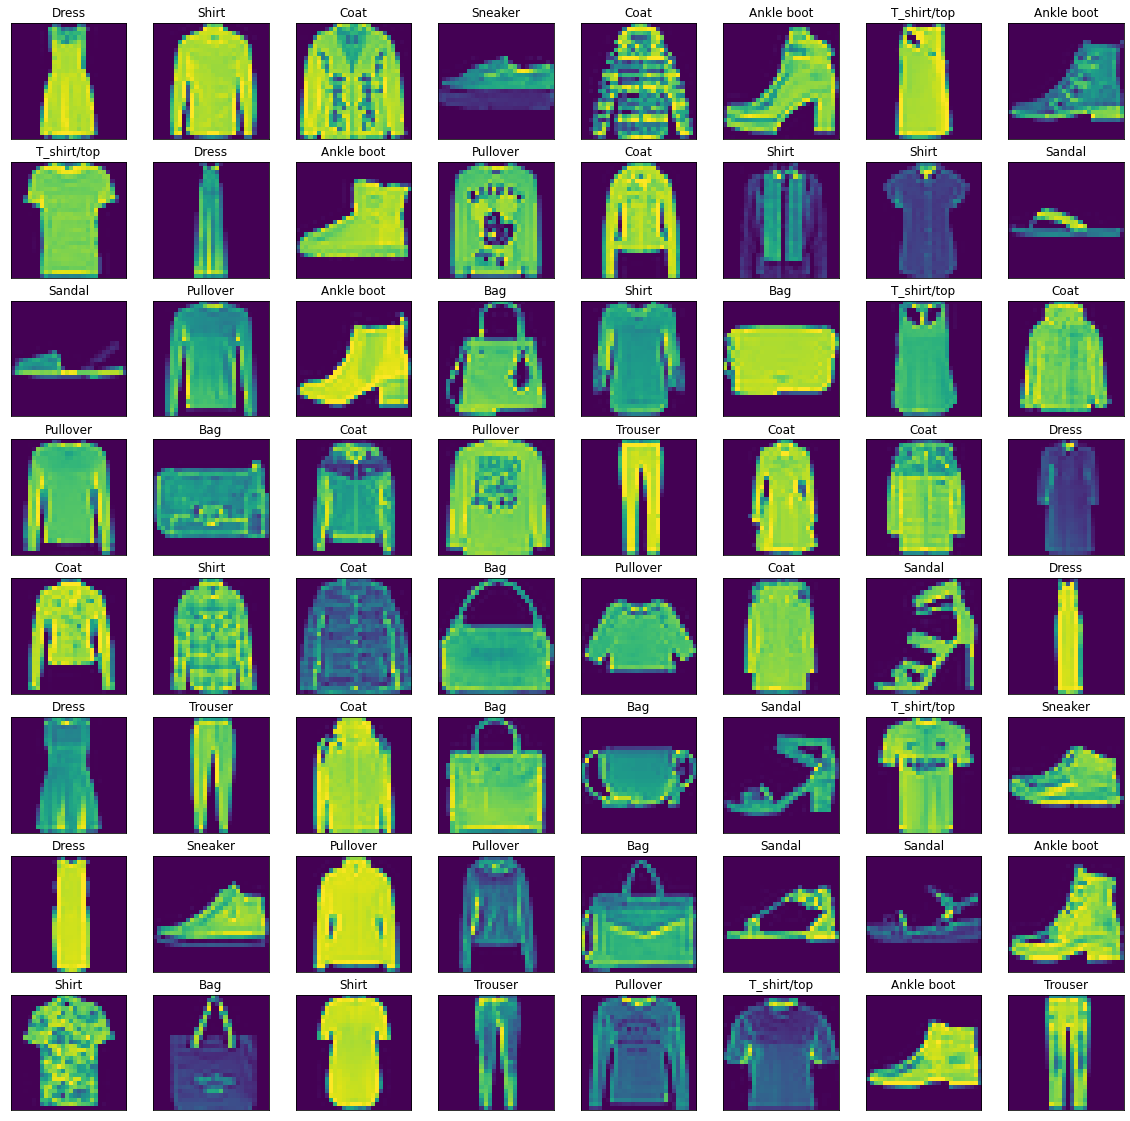

In [40]:
plt.figure(figsize=(20, 20))

for i in range(64):
    displayImage(train_image[i], train_label[i])
plt.show()

### 5. Building Convolutional Neural Network

Defining the shapes of the images in train_image and test_image numpy arrays to make them suitable for training the CNN model.
The accepted shape of the image must be in the format:
* First element is the number of images in train and test datasets respectively.
* Second element is the number of rows in an image i.e 28
* Third element is the number of columns in an image i.e 28
* Fourth element is 1 which shows that the images are greyscale.

In [21]:
image_rows = 28
image_columns = 28
image_shape = (image_rows,image_columns,1)
train_images_count = train_image.shape[0]
test_images_count = test_image.shape[0]
validate_images_count = validate_image.shape[0]

In [22]:
train_image = train_image.reshape(train_images_count,*image_shape)
test_image = test_image.reshape(test_images_count,*image_shape)
validate_image = validate_image.reshape(validate_images_count,*image_shape)

#### Defining the CNN Model

We use Sequential API for defining CNN as it allows us to build the model layer by layer.

*The first hidden convolutional layer consists of:*
* 32 filters: Each filter helps us to identify some aspect of the image such as corners, vertical boundaries, horizontal boundaries etc.
* 3 x 3 kernel: Its is small grid of numbers which can be passed over our entire image. As kernel moves over the image, it transforms the pixel values of the image based on the kernel values. Different kernel sizes leads to different kinds of image pre-processing such as constrast, blur, sharpen etc.
* 'relu' activation function - It makes sure that the values passed to the model are within the tunnable range. If the value is 0 or less than 0, then the function will pass the value as 0 to the model.

*The second layer is the Max Pooling layer:*
* The main objective of this layer is to reduce the dimensionality of the data. 
* We are having a pool size of 2 x 2, so it will replace the 4 pixel from the output of first hidden layer with the max value in that window.
* This window move until the entire image has been covered.
* So ultimately, this layer will reduce the image dimensions from 28x28 to 14x14.

*The third layer is the Flatten layer:*
* It transforms the image from 2D array (28 pixels x 28 pixels) into a one dimensional array (28 x 28 = 784 pixels)

*Following the Flatten layer, there are two Dense layers. These are densely or fully connected layers.*
* The first layer consists of 32 nodes
* The second layer consists of 10 nodes whose responsibility is to return the array of probability scores. Each score indicates the probability with which the current image belongs to one of the 10 class labels. These probability scores will add up to 1.

In [27]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax') 
])

#### Compiling the model

Before starting to train the model, following components will be added to the model:
* *Loss Function* - Our aim will be to minimize the loss function to improve the accuracy of the model
* *optimizer* - This is the way in which the model will behave based on the image and the loss function value
* *metrics* - used to monitor the accuracy of the model


In [28]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

#### Training the model

Providing the training data (train_image and train_label) to the model so that model can learn the association between the image and its corresponding label.

In [29]:
trained_model = cnn_model.fit(
    train_image,
    train_label,
    batch_size = 4096,
    epochs = 25,
    verbose = 1,
    validation_data = (validate_image,validate_label)
)


Epoch 1/25
12/12 [==============================] - 9s 771ms/step - loss: 1.6681 - accuracy: 0.5209 - val_loss: 1.0625 - val_accuracy: 0.6537
Epoch 2/25
12/12 [==============================] - 12s 1s/step - loss: 0.8655 - accuracy: 0.7117 - val_loss: 0.7080 - val_accuracy: 0.7482
Epoch 3/25
12/12 [==============================] - 14s 1s/step - loss: 0.6507 - accuracy: 0.7677 - val_loss: 0.5819 - val_accuracy: 0.7929
Epoch 4/25
12/12 [==============================] - 13s 1s/step - loss: 0.5629 - accuracy: 0.7986 - val_loss: 0.5242 - val_accuracy: 0.8147
Epoch 5/25
12/12 [==============================] - 23s 2s/step - loss: 0.5134 - accuracy: 0.8217 - val_loss: 0.4786 - val_accuracy: 0.8397
Epoch 6/25
12/12 [==============================] - 15s 1s/step - loss: 0.4800 - accuracy: 0.8339 - val_loss: 0.4478 - val_accuracy: 0.8521
Epoch 7/25
12/12 [==============================] - 16s 1s/step - loss: 0.4554 - accuracy: 0.8417 - val_loss: 0.4269 - val_accuracy: 0.8555
Epoch 8/25
12/12 [

In [35]:
print(trained_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Creating Training Loss Vs. Epoch graph:**

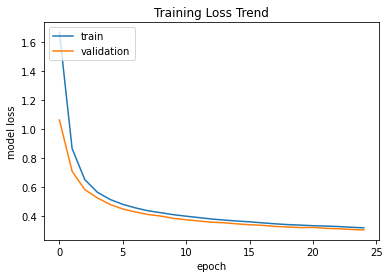

In [36]:
plot_1 = trained_model.history['loss']
plot_2 = trained_model.history['val_loss']
plt.plot(plot_1)
plt.plot(plot_2)
plt.title('Training Loss Trend')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

We can observe that both the training and validation loss curves are decreasing and gaining some stability in the end. Also, the gap between both the loss values is minimal as they attain the stability.

Hence, it can be said that our training model yields a good fit learning curve.

**Creating Training Accuracy Vs. Epoch graph:**

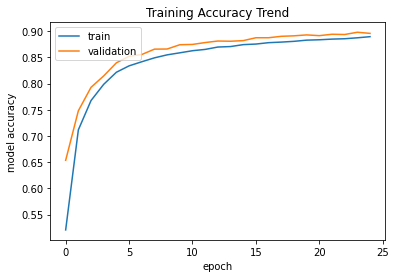

In [37]:
plot_1 = trained_model.history['accuracy']
plot_2 = trained_model.history['val_accuracy']
plt.plot(plot_1)
plt.plot(plot_2)
plt.title('Training Accuracy Trend')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

We can observe that both the training and validation accuracy curves are increasing and gaining some stability in the end. Also, the gap between both the accuracy values is minimal as they attain the stability.

Hence, it can be said that our training model yields a good fit learning curve.

### 6. Evaluating Model Performance

We will evaluate the performance of CNN model based on the number of correct and incorrect predictions made by the model on the test dataset.

Once we obtain the predicted class labels, we will compare those with the known class labels from the test dataframe.

**Calculating prediction accuracy:**

In [38]:
evaluation_params = cnn_model.evaluate(test_image, test_label)
print("The final loss for testing data is {}%".format(round(evaluation_params[0] * 100),2))
print("The final accuracy for testing data is {}%".format(round(evaluation_params[1] * 100),2))

313/313 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8822
The final loss for testing data is 33%
The final accuracy for testing data is 88%


**Creating Evaluation Report:**

In [94]:
predicted_label = cnn_model.predict_classes(test_image)
predicted_label_df = pd.DataFrame(predicted_label)
ground_truth_df = test_df['Label']
label_names = ['T_shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker', 'Bag', 'Ankle boot']

model_evaluation_report = classification_report(ground_truth_df, predicted, target_names = label_names)
print(model_evaluation_report)

              precision    recall  f1-score   support

 T_shirt/top       0.81      0.87      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.80      0.82      1000
       Dress       0.87      0.92      0.89      1000
        Coat       0.82      0.84      0.83      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.72      0.65      0.68      1000
     Sneaker       0.92      0.96      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



From the above report, we can observe that:
* Model is able to classify Trouser with the maximum precision.
* Model is classifying Shirt with least precision.

**Creating Confusion Matrix:**

In [95]:
confusion_matrix = metrics.confusion_matrix(y_true = ground_truth_df, y_pred = predicted_label_df)

In [96]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(50, 50))
    plt.show()

Confusion matrix, without normalization


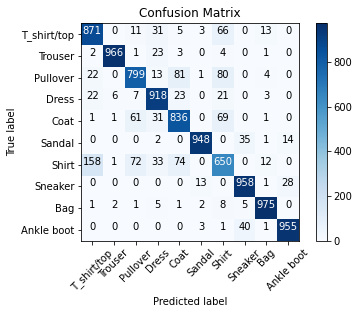

<Figure size 3600x3600 with 0 Axes>

In [97]:
plot_confusion_matrix(cm = confusion_matrix, classes = label_names, title='Confusion Matrix')

Confusion Matrix can be interpreted as follows:
* X-axis represents the predicted label by the model.
* Y-axis represents the actual labels for the image.
* The values in blue colored sections are the number of labels correctly classified by the model.
* The values in light colored sections are the number of labels mis-classified by the model.

It can be easily observed that out of 1000 samples, Shirt was classified correctly only 650 times. Remaining times, it was mis-classified as T-Shirt/Top for 158 times.

The model has performed very well in classifying Trouser and Bag. 
* It has been correctly classified Trouser for 966 times out of 1000 samples.
* It has been correctly classified Bag for 975 times out of 1000 samples.

## Conclusion

* Model was able to classify the images with 89% accuracy.
* Trouser and Bag were the most accurately classified objects.
* Shirt was the most mis-classified object as T-Shirt/Top. 